In [119]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [120]:
NET = "grid2x2"
METRIC = "mean_total_wait"  # total_tyre_pm, mean_total_wait, etc.
XLABEL = "Average Total Waiting Time"  # Non-exhaust Emission, Average Total Waiting Time, etc.
NET_NAME = "2$\\times$2 Grid"  # Single Intersection, 2$\\times$2 Grid, etc.

baseline_df = pd.read_csv(os.path.join("..", "no_rl", NET, "collated_results.csv"))
ppo_df = pd.read_csv(os.path.join("..", NET, "collated_results.csv"))

In [121]:
baseline_data = baseline_df[METRIC]
mean_baseline, std_baseline = norm.fit(baseline_data)
med_baseline = np.median(baseline_data)

ppo_data = ppo_df[METRIC]
mean_ppo, std_ppo = norm.fit(ppo_data)
med_ppo = np.median(ppo_data)

print("Fixed-Time Control")
print(f"  Mean: {mean_baseline:.3f}")
print(f"Median: {med_baseline:.3f}")
print(f"    SD: {std_baseline:.3f}")

print("\nRL Control")
print(f"  Mean: {mean_ppo:.3f}")
print(f"Median: {med_ppo:.3f}")
print(f"    SD: {std_ppo:.3f}")

Fixed-Time Control
  Mean: 116653.316
Median: 116353.329
    SD: 4545.554

RL Control
  Mean: 113247.070
Median: 113729.395
    SD: 2859.117


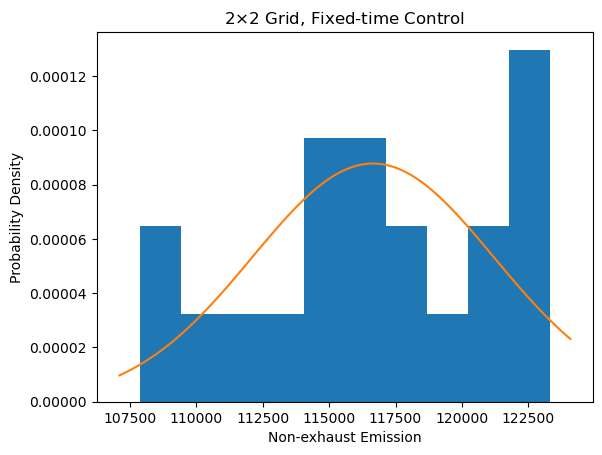

In [122]:
# Fixed-time control
plt.hist(baseline_data, density=True)

xmin, xmax = plt.xlim()
x_baseline = np.linspace(xmin, xmax, 100)
p_baseline = norm.pdf(x_baseline, mean_baseline, std_baseline)

plt.plot(x_baseline, p_baseline)

plt.xlabel(XLABEL)
plt.ylabel("Probability Density")
plt.title(f"{NET_NAME}, Fixed-time Control")

plt.show()

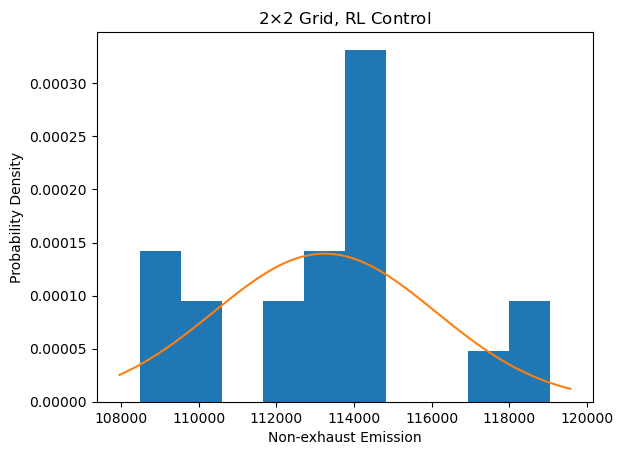

In [123]:
# RL control
plt.hist(ppo_data, density=True)

xmin, xmax = plt.xlim()
x_ppo = np.linspace(xmin, xmax, 100)
p_ppo = norm.pdf(x_ppo, mean_ppo, std_ppo)

plt.plot(x_ppo, p_ppo)

plt.xlabel(XLABEL)
plt.ylabel("Probability Density")
plt.title(f"{NET_NAME}, RL Control")

plt.show()

In [124]:
CONF_LVL = 95  # percent

print(
f"The null hypothesis is that the distribution of NEE under RL control is the same as the distribution of \
NEE under fixed-time control. It was decided that a confidence level of {CONF_LVL}% is required to reject \
the null hypothesis in favour of the alternative: that under RL control, less NEE would be emitted.\n")

print(
f"Descriptive analysis shows that the mean NEE under RL control ({mean_ppo:.2f}, SD={std_ppo:.2f}) is significantly lower than\
the mean NEE under the baseline fixed-time control ({mean_baseline:.2f}, SD={std_baseline:.2f}). It is also noted that the median \
for the RL-controlled simulations ({med_ppo:.2f}) is lower than the median for the baseline simulations ({med_baseline:.2f}).")

The null hypothesis is that the distribution of NEE under RL control is the same as the distribution of NEE under fixed-time control. It was decided that a confidence level of 95% is required to reject the null hypothesis in favour of the alternative: that under RL control, less NEE would be emitted.

Descriptive analysis shows that the mean NEE under RL control (113247.07, SD=2859.12) is significantly lower thanthe mean NEE under the baseline fixed-time control (116653.32, SD=4545.55). It is also noted that the median for the RL-controlled simulations (113729.40) is lower than the median for the baseline simulations (116353.33).


In [126]:
from scipy.stats import mannwhitneyu

_, p = mannwhitneyu(ppo_data, baseline_data, alternative="less")
print("p =", p)
if p < 0.05:
    p_report = "significant "
    if p < 0.001:
        p_report += "(p < 0.001)"
    else:
        p_report += f"p = {p:.3f}"
else:
    p_report = f"not significant (p={p:.3f})"

print(
f"As the data is not normally distributed, non-parametric statistics has been \
used. Mann-Whitney U test analysis shows that this difference is {p_report}.")

p = 0.004893243363538507
As the data is not normally distributed, non-parametric statistics has been used. Mann-Whitney U test analysis shows that this difference is significant p = 0.005.


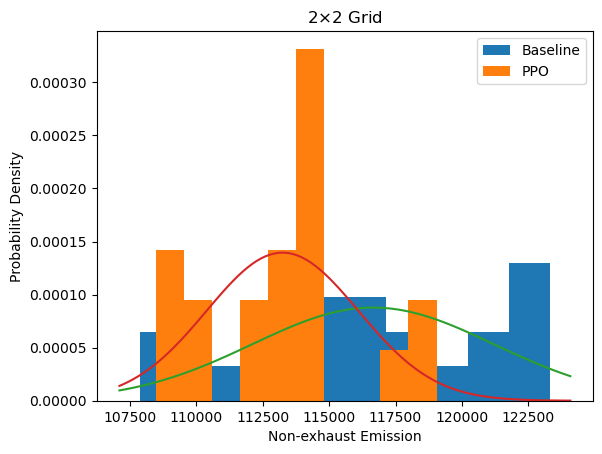

In [133]:
# Combined
plt.hist(baseline_data, density=True, label="Baseline")
plt.hist(ppo_data, density=True, label="PPO")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

p_baseline = norm.pdf(x, mean_baseline, std_baseline)
p_ppo = norm.pdf(x, mean_ppo, std_ppo)

plt.plot(x, p_baseline)
plt.plot(x, p_ppo)

plt.xlabel(XLABEL)
plt.ylabel("Probability Density")
plt.title(NET_NAME)

plt.legend()
plt.show()